In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
from Ps_library_temp import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

In [34]:
system = Ps_system(N_points=100)
sequence = laser_sequence()
rabi0 = 2*np.pi*(600e-3)
chirp = 2*np.pi*(2500e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 1
system.flag_SE_distributive = True
system.flag_photoionisation = True
system.flag_annihilation = True

handler = data_handler()
opts = qt.Options(store_states=True)
saved_states = []
results = []
stds = []
expect_ph = []
system.init_distribution_MB()

cooling_kwargs = {               
    "scale":100,
    "rabi0" : rabi0,
    "pulse_duration" : pulse_duration,
    "start":0,
    "end":int(3*pulse_duration),
    "label":"cooling",
    "unit_wavevector":1,
    "chirp":chirp,
    "detuning0":detuning
    }
no_laser_kwargs = {
    "scale":100,
    "rabi0" : 0,
    "detuning0": 0,
    "chirp" : 0,
    "pulse_duration" : pulse_duration,
    "unit_wavevector":direction,
    "start":0,
    "end":4,
    "isSE" : True
    } 

sequence.init_pulse(cooling_kwargs)

201
[8.97149497806281e-05, 9.898604456507014e-05, 0.00010910731909138448, 0.00012014468451305775, 0.00013216790324145384, 0.00014525068909947898, 0.00015947079707328678, 0.00017491010106377735, 0.00019165465796763397, 0.0002097947563523716, 0.0002294249479325301, 0.0002506440600061527, 0.000273555186973255, 0.000298265659032589, 0.00032488698614093614, 0.00035353477532177664, 0.00038432861942885063, 0.00041739195550607544, 0.0004528518909397852, 0.0004908389956733895, 0.0005314870588494292, 0.0005749328083604389, 0.0006213155919288966, 0.0006707770184983498, 0.0007234605589030386, 0.0007795111049921931, 0.0008390744866175901, 0.0009022969461487833, 0.0009693245704589938, 0.0010403026806253346, 0.0011153751799086336, 0.0011946838609193271, 0.0012783676732350245, 0.0013665619531103288, 0.0014593976173082439, 0.0015570003234820827, 0.0016594895999447437, 0.0017669779480749038, 0.0018795699210240433, 0.0019973611828002463, 0.0021204375522107448, 0.002248874036540864, 0.002382733860228225, 

In [35]:
directory = "./data/annihilation_tests/"
handler = data_handler()
sorted_sequence = sequence.pull_sorted_sequence()
opts = qt.Options(store_states=True)
saved_states = []
results = []
stds = []
expect_ph = []
for laser in sorted_sequence:
    laser = laser[1]
    print("Simulating {} ....".format(laser.label))
    if laser.isSE == True:
        SE_rate = 1 # 1ps corresponds to 3ns in this time-window
    else:
        SE_rate = None
    system.create_composite(laser,SE_rate)
    if laser.order == 0:
        system.init_states_desymmetrized() # ideally desymmetrized
        states = system.states
        #std = handler.expect_standard_deviation(states,system.N_points)
        #stds.append(std)
        #saved_states.append(states)
    system.set_Hamiltonian_MT_general_laser(laser)
    result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = states,e_ops = system.e_ops,c_ops=system.c_ops,options=opts)
    
    
    states = result.states[-1]
    
    #std = handler.expect_standard_deviation(states,system.N_points)
    #stds.append(std)

    #selector = qt.tensor(qt.qeye(system.N_points),qt.Qobj([[0,0,0],[0,0,0],[0,0,1]]))
    #expect_ph.append((states*selector).tr())
    #print("std: {}".format(std))
    
    #results.append(result)
    #saved_states.append(states)

    filename = "{}_{}.csv".format(laser.order,laser.label)
    path = directory+filename
    qt.qsave(result,path)
print("Done!")


Simulating cooling ....
ann. 2 0
4
passed_else
ph. 3 1
4
passed_try
Done!


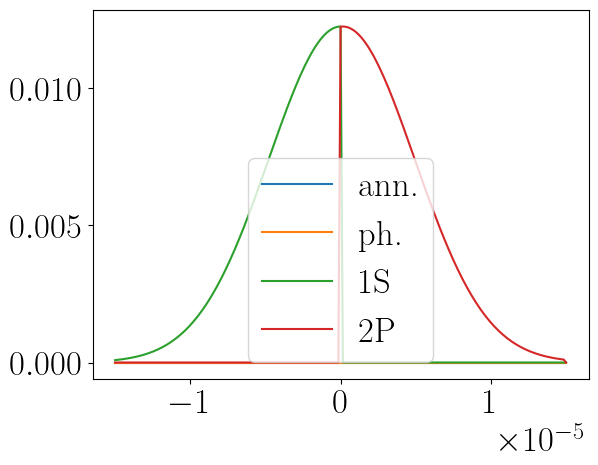

In [38]:
directory = "./data/annihilation_tests/"
files = os.listdir(directory)
files_sorted = sorted(files,key=lambda x:int(x.split("_")[0]))
file = files_sorted[0]
path = directory+file
result = qt.qload(path)
#print(result.times)
system.organise_result(result)


for key in system.expect:
    plt.plot(system.velocity_bins,system.expect[key][0],label=key)
plt.legend()

# Many trains

In [10]:
system = Ps_system(N_points=100)
sequence = laser_sequence()
rabi0 = 2*np.pi*(150e-3)
chirp = 2*np.pi*(250e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 10
system.flag_SE_distributive = True
system.flag_photoionisation = True
system.flag_annihilation = True

handler = data_handler()
opts = qt.Options(store_states=True)
saved_states = []
results = []
stds = []
expect_ph = []
system.init_distribution_MB()

cooling_kwargs = {               
    "scale":100,
    "rabi0" : rabi0,
    "pulse_duration" : pulse_duration,
    "start":0,
    "end":int(3*pulse_duration),
    "label":"cooling",
    "unit_wavevector":1,
    "chirp":chirp,
    "detuning0":detuning
    }
no_laser_kwargs = {
    "scale":100,
    "rabi0" : 0,
    "detuning0": 0,
    "chirp" : 0,
    "pulse_duration" : pulse_duration,
    "unit_wavevector":direction,
    "start":0,
    "end":4,
    "isSE" : True
    } 

N_pulses_in_train = 52
N_trains = 1
for j in range(N_trains):
    #desymmetrization_kwargs["label"] = "desymmetrization" +str(j)
    #sequence.init_pulse(desymmetrization_kwargs)
    
    for i in range(N_pulses_in_train):
        cooling_kwargs["label"]="cooling"+str(i+N_pulses_in_train*j)
        cooling_kwargs["unit_wavevector"] = (-1)**i*direction
        cooling_kwargs["detuning0"] = (-1)**i*detuning
        cooling_kwargs["chirp"] = (-1)**i*chirp
        sequence.init_pulse(cooling_kwargs)

    no_laser_kwargs["label"] = "no_laser"+str(j)
    sequence.init_pulse(no_laser_kwargs)

In [11]:
handler = data_handler()
sorted_sequence = sequence.pull_sorted_sequence()
opts = qt.Options(store_states=True)
saved_states = []
results = []
stds = []
expect_ph = []
directory = "./data/single_train_all_dissipation_52pulses_4SE_10ps/"
first_iter = True
for laser in sorted_sequence:
    laser = laser[1]
    print("Simulating {} ....".format(laser.label))
    if laser.isSE == True:
        SE_rate = 1 # 1ps corresponds to 3ns in this time-window
        ann_rate = 1/47.33 # 1ps corresponds to 3ns in this time-window 
    else:
        SE_rate = None
        ann_rate = None
    system.create_composite(laser,SE_rate,ann_rate)
    system.init_states_ground()
    if first_iter:
        desymmetrizer_qobj = qt.tensor(qt.qdiags(np.where(system.momentum_bins > 0,1,0),offsets=0),qt.Qobj([[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1]]))
        keep_state_qobj = qt.tensor(qt.qdiags(np.where(system.momentum_bins <=0,1,0),offsets=0),qt.Qobj([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]))
        
        # desymmetrizer_qobj = qt.tensor(qt.qdiags(np.where(system.momentum_bins > 0,1,0),offsets=0),qt.Qobj([[0,1,0],[1,0,0],[0,0,1]]))
        # keep_state_qobj = qt.tensor(qt.qdiags(np.where(system.momentum_bins <=0,1,0),offsets=0),qt.Qobj([[1,0,0],[0,1,0],[0,0,1]]))
        
        states = (desymmetrizer_qobj*system.states.copy()*desymmetrizer_qobj.dag() + keep_state_qobj*system.states.copy()*keep_state_qobj.dag()).unit()
        first_iter = False
        
    system.set_Hamiltonian_MT_general_laser(laser)
    result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = states,e_ops = system.e_ops,c_ops=system.c_ops,options=opts)
    states = result.states[-1]
    
    filename = "{}_{}.csv".format(laser.order,laser.label)
    path = directory+filename
    qt.qsave(result,path)
print("Done!")

Simulating cooling0 ....
Simulating cooling1 ....
Simulating cooling2 ....
Simulating cooling3 ....
Simulating cooling4 ....
Simulating cooling5 ....
Simulating cooling6 ....
Simulating cooling7 ....
Simulating cooling8 ....
Simulating cooling9 ....
Simulating cooling10 ....
Simulating cooling11 ....
Simulating cooling12 ....
Simulating cooling13 ....
Simulating cooling14 ....
Simulating cooling15 ....
Simulating cooling16 ....
Simulating cooling17 ....
Simulating cooling18 ....
Simulating cooling19 ....
Simulating cooling20 ....
Simulating cooling21 ....
Simulating cooling22 ....
Simulating cooling23 ....
Simulating cooling24 ....
Simulating cooling25 ....
Simulating cooling26 ....
Simulating cooling27 ....
Simulating cooling28 ....
Simulating cooling29 ....
Simulating cooling30 ....
Simulating cooling31 ....
Simulating cooling32 ....
Simulating cooling33 ....
Simulating cooling34 ....
Simulating cooling35 ....
Simulating cooling36 ....
Simulating cooling37 ....
Simulating cooling38 .

In [8]:
directory = "./data/single_train_all_dissipation_52pulses_4SE_10ps/"
files = os.listdir(directory)
files_sorted = sorted(files,key=lambda x:int(x.split("_")[0]))
file = files_sorted[3]
path = directory+file
result = qt.qload(path)
#print(result.times)
system.organise_result(result)


for key in system.expect:
    plt.plot(system.velocity_bins,system.expect[key][0],label=key)

plt.legend(fontsize=20)

IndexError: list index out of range

In [14]:
directory = "./data/single_train_all_dissipation_52pulses_4SE_10ps/"
handler = data_handler()

files = os.listdir(directory)
files_sorted = sorted(files,key=lambda x:int(x.split("_")[0]))

N_points = 201
file = files_sorted[0]
path = directory+file
result = qt.qload(path)
stds = [handler.expect_standard_deviation(result.states[0],N_points)]

for i in range(len(files_sorted)):
    file = files_sorted[i]
    path = directory+file
    result = qt.qload(path)
    #print(path)
    stds.append(handler.expect_standard_deviation(result.states[-1],N_points))
    
print(stds)
#np.savetxt("sigma_p_data.txt",stds)
fig,ax = plt.subplots()
ax.plot(np.arange(len(stds)),stds)
plt.xlabel("number of pulses")
plt.ylabel(r"$\sigma_p [\hbar k]$")
plt.show()

[31.53446581318858, 30.7460232588108, 29.98933131690702, 29.252580715081606, 28.52853203315847, 27.8258430516857, 27.175185984356087, 26.52810965024256, 25.960650542722387, 25.403281084632408, 24.809465810999065, 24.285355644119537, 23.7590996260149, 23.284750675451075, 22.773071742562443, 22.27740153800282, 21.789455643916625, 21.43296168382629, 21.034741123029427, 20.767181688456287, 20.513862867149847, 20.3239404151196, 20.12012551807057, 19.969805647416706, 19.838884431873602, 19.86019199939877, 19.90102656620381, 20.11114660540792, 20.267679738868665, 20.45184547264909, 20.718145060197102, 21.014500793918813, 21.360311882908697, 21.747802099526197, 22.198317521560732, 22.72562005492997, 23.336772065504434, 23.87476454069608, 24.401088975590543, 24.9790452666407, 25.586839876559534, 26.26451114335901, 26.885900477453912, 27.583128939219772, 28.358670968880038, 29.07674042162768, 29.855592966377138, 30.468288234536388, 31.220460872602324, 31.944088531102256, 32.670079490287925, 33.4

AttributeError: 'list' object has no attribute 'argmin'

In [16]:
print(np.argmin(np.asarray(stds)))

24


: 

# Investigate multi-train 

In [2]:
system = Ps_system(N_points=100)
sequence = laser_sequence()
rabi0 = 2*np.pi*(600e-3)
chirp = 2*np.pi*(2500e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 1
system.flag_SE_distributive = True
system.flag_photoionisation = True
system.flag_annihilation = True

handler = data_handler()
opts = qt.Options(store_states=True)
saved_states = []
results = []
stds = []
expect_ph = []
system.init_distribution_MB()

cooling_kwargs = {               
    "scale":100,
    "rabi0" : rabi0,
    "pulse_duration" : pulse_duration,
    "start":0,
    "end":int(3*pulse_duration)
    }

directory = "./data/SE_scan/"

j = 0 # SE counter for saving results to file
l = 0 # desymmetrization counter 
idx_SE = 0 # counter for SE times
first_iter = True

SE_times = [0.04,0.06,0.11,0.13,0.19,0.21,0.28,0.3,0.37,0.4,0.47,0.5,0.59,0.61,0.72,0.75,0.87,0.9,1.04,1.08,1.26,1.3,1.53,1.57,1.92,1.96,2.55,2.6,4.6,4.7,5.0,5.5,0.06,0.13,0.21,0.3,0.39,0.5,0.61,0.74,0.89,1.27,1.55,1.91,2.5,3.9]
file_path = "./data/initial_state_for_SE_sims_all_dissipation/24_cooling24.csv"
for SE_time in SE_times:
    savepath =directory+"/"+str(SE_time)
    os.makedirs(savepath)
    
    """
    Initialize state after last cooling pulse from previous train, and then wait SE_time number with just SE
    """    
    
    no_laser_kwargs = {
    "scale":10,
    "rabi0" : 0,
    "detuning0": 0,
    "chirp" : 0,
    "pulse_duration" : pulse_duration,
    "unit_wavevector":direction,
    "start":0,
    "end":SE_time,
    "isSE" : True
    } 
    count_total = 0 # total number of files per SE_time
    result = qt.qload(file_path)
    states = result.states[-1].copy()

    no_laser_kwargs["label"] = "no_laser"+str(j)
    sequence.init_pulse(no_laser_kwargs)
    sorted_sequence = sequence.pull_sorted_sequence()
    laser = sorted_sequence[-1][1]

    SE_rate_fast = 1
    ann_rate_fast = 1/47.33 # 1ps corresponds to 3ns in this time-window 
    system.create_composite(laser,SE_rate_fast,ann_rate_fast)
    
    system.set_Hamiltonian_MT_general_laser(laser)
    result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = states,e_ops = system.e_ops,c_ops=system.c_ops,options=opts)
    states = result.states[-1].copy()

    stds.append( handler.expect_standard_deviation(states,system.N_points))
    j+=1
    
    filename = "/{}_{}.csv".format(count_total,"SE"+str(j))
    
    path = savepath+filename
    qt.qsave(result,path)
    count_total +=1
    print("Waited {} SE lifetimes".format(SE_time))
    
    
    """
    Desymmetrization
    """

    desymmetrizer_qobj = qt.tensor(qt.qdiags(np.where(system.momentum_bins > 0,1,0),offsets=0),qt.Qobj([[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1]]))
    keep_state_qobj = qt.tensor(qt.qdiags(np.where(system.momentum_bins <=0,1,0),offsets=0),qt.Qobj([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]))
    states = (desymmetrizer_qobj*states.copy()*desymmetrizer_qobj.dag() + keep_state_qobj*states.copy()*keep_state_qobj.dag()).unit()
    
    std = handler.expect_standard_deviation(states,system.N_points)
    stds.append(std)
    std_curr = std
    std_next = 0 # variable is initialized so that it is ALWAYS smaller than std_curr
    l +=1

    # filename = "SE{}_{}_{}.csv".format(idx_SE,count_total,"desymmetrization"+str(l))
    
    # path = directory+filename
    # qt.qsave(result,path)
    # count_total +=1
    print("Desymmetrization done")
    k=0
    i=0    

    """
    Send in cooling pulses until you reach the minimum momentum spread
    """
    while True:

        # send in cooling pulses until loop condition is broken
        
        cooling_kwargs["label"]="cooling"+str(k)
        cooling_kwargs["unit_wavevector"] = (-1)**i*direction
        cooling_kwargs["detuning0"] = (-1)**i*detuning
        cooling_kwargs["chirp"] = (-1)**i*chirp
        sequence.init_pulse(cooling_kwargs)
        sorted_sequence = sequence.pull_sorted_sequence()
        laser = sorted_sequence[-1][1]
        
        system.set_Hamiltonian_MT_general_laser(laser)
        system.create_composite(laser,None,None)
        result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = states,e_ops = system.e_ops,c_ops=system.c_ops,options=opts)
        states = result.states[-1].copy()
        std_next = handler.expect_standard_deviation(states,system.N_points)
        
    
        k+=1
        i+=1
        if std_next > std_curr:
            print("Minimum reached for train of pulses...")
            i-=1
            break    

        
        print("std: {}".format(std_curr))
        stds.append(std_next)
        std_curr = std_next
        
        filename = "/{}_{}.csv".format(count_total,"cooling"+str(k))
        path = savepath+filename
        qt.qsave(result,path)
        count_total +=1

    # wait for spontaneous emission

    no_laser_kwargs["label"] = "no_laser"+str(j)
    sequence.init_pulse(no_laser_kwargs)
    sorted_sequence = sequence.pull_sorted_sequence()
    laser = sorted_sequence[-1][1]

    SE_rate_fast = 1
    ann_rate_fast = 1/47.33 # 1ps corresponds to 3ns in this time-window 
    system.create_composite(laser,SE_rate_fast,ann_rate_fast)
    
    system.set_Hamiltonian_MT_general_laser(laser)
    result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = states,e_ops = system.e_ops,c_ops=system.c_ops,options=opts)
    states = result.states[-1]    

    stds.append( handler.expect_standard_deviation(states,system.N_points))
    j+=1
    
    filename = "/{}_{}.csv".format(count_total,"SE"+str(j))
    
    path = savepath+filename
    qt.qsave(result,path)
    count_total +=1
    idx_SE +=1


Waited 4 SE lifetimes
Desymmetrization done
std: 20.368881263801235
std: 19.96346693942304
std: 19.66619613863965
std: 19.49394402821261
std: 19.326999267725622
